In [1]:
from IPython.display import Image
import numpy as np

### Q1. (15pts) 

（Solve by hand)

Given the following learned Bayesian network structure explaining the relationships

between variables in container shipping data:

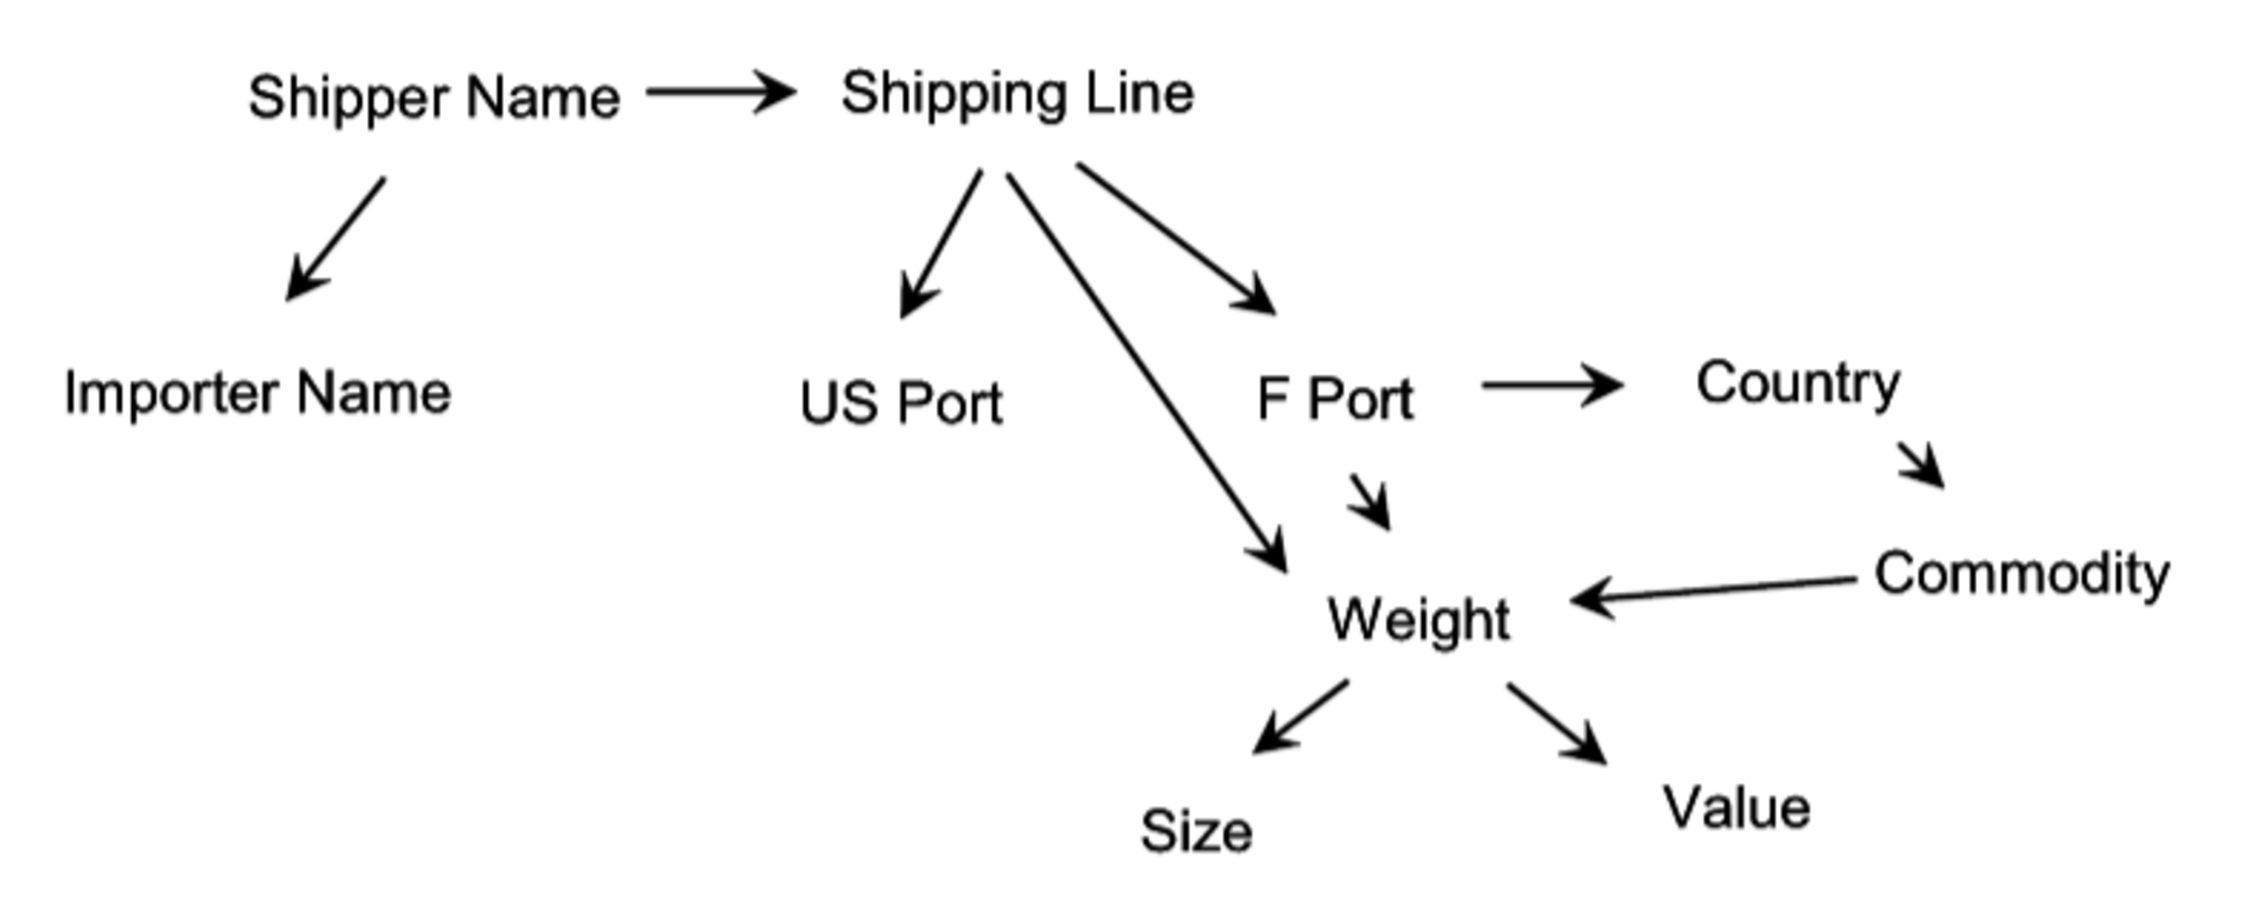

In [2]:
Image('Q1.png')

### 1) Which of the following conditional independence relationships hold? Choose

“Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?  
#### Dependent

CI (Shipper Name, Value | Shipping Line)? 
#### Dependent

CI (Foreign Port, Commodity | Country)? 
#### Independent

CI (Foreign Port, Commodity | County, Weight)? 
#### Dependent

### 2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (10%), Los Angeles (90%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

In [3]:
#a)Pr(Heavy, ASCO, Vancouver, Seattle) = Pr(ASCO)*Pr(Seattle|ASCO)*Pr(Vancouver|ASCO)*Pr(Heavy|ASCO,Vancouver)

P_a = 0.3 * 1 * 1 * 0.2 
P_a

0.06

In [4]:
#b)Pr(Heavy, CSCO, Vancouver, Seattle) = Pr(CSCO)*Pr(Seattle|CSCO)*Pr(Vancouver|CSCO)*Pr(Heavy|CSCO,Vancouver)

P_b = 0.7 * 0.1 * 0.6 * 0.15 
P_b

0.006299999999999999

In [5]:
#c)Pr(Heavy, CSCO, Yokohama, Los Angeles) = Pr(CSCO)*Pr(Los angeles|CSCO)*Pr(Yokohama|CSCO)*Pr(Heavy|CSCO,Yokohama)

P_c = 0.7 * 0.9 * 0.4 * 0.6 
P_c

0.1512

In [6]:
min(P_a, P_b, P_c)

0.006299999999999999

### Which can leads to the answer that the package b is the most anomalous

### Q2. Bayesian Network Learning (35pts)

In this question, we use data: "Q2.csv" for Bayesian Network Learning.

In [7]:
from pgmpy.models import BayesianModel  
from pgmpy.factors.discrete import TabularCPD

In [8]:
import pandas as pd
data2=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q2.csv")
from sklearn.cross_validation import train_test_split
train,test=train_test_split(data2,random_state=9,test_size=0.4)

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
data2.head()

,A,B,C,D,E,F,G,H
0,2,1,0,0,1,0,1,3
1,4,1,1,2,0,1,0,4
2,3,2,0,0,0,2,0,3
3,4,1,0,0,2,1,2,7
4,5,1,1,2,1,0,2,8


**a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10pts)**



In [10]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

In [11]:
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print("The best structure:")
print(best_model.edges())

The best structure:
[('A', 'C'), ('A', 'B'), ('A', 'D'), ('H', 'A'), ('H', 'G')]


**b) Use Bayesian Estimator to estimate the CPDs for your model and visulize the network with CPDs. (15pts)**



In [12]:
from pgmpy.estimators import BayesianEstimator


In [13]:
best_model = BayesianModel([('A', 'C'), ('A', 'B'), ('A', 'D'), ('H', 'A'), ('H', 'G')])
best_model.fit(data2, estimator=BayesianEstimator, prior_type = 'BDeu', equivalent_sample_size = 10)
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable = cpd.variable))
    print(cpd)

CPD of A:
+------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+------------------+-----------------+
| H    | H(0)            | H(1)             | H(2)             | H(3)              | H(4)              | H(5)              | H(6)              | H(7)              | H(8)              | H(9)              | H(10)           | H(11)            | H(12)           |
+------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+------------------+-----------------+
| A(0) | 0.88            | 0.279151943463   | 0.188481675393   | 0.0174064403829   | 0.000285143997719 | 0.000169894665308 | 0.000156421085562 | 0.000173340266944 | 0.000224416517056 | 0.000497017892644 | 0.001

**c) Use the model to predict "A" using the testing dataset. Report the OS prediction accuracy. (10pts)**   

In [14]:
A_pre = best_model.predict(test[['B','C','D','G','H']])

In [15]:
print('The OS prediction accuracy of predicting A is {}%.'\
      .format(100.0*sum(A_pre['A'] == test['A'])/len(test)))

The OS prediction accuracy of predicting A is 52.7%.


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50pts)
In this question you will use k-means clustering in sklearn and hierarchical clustering in scipy. “Do different types of crime display different trends over space and time?” The dataset “Q3.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016. For each crime type, we have various features representing the spatial and temporal distribution of crime, including:
-The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

-The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 
= 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

-The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 
… community_area_77).
We also have, for each crime type, its categorization by the FBI:

-Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

-Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

-Category = “P2” corresponds to Part 2 (less serious) crimes.

For parts a-f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day attributes.

In [16]:
data3=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3.csv")

In [17]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Q3_2.csv")

**a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)**



In [18]:
data3_a = data3[['hour_0','hour_1','hour_2','hour_3','hour_4',\
                'hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11',\
                'hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18',\
                'hour_19','hour_20','hour_21','hour_22','hour_23']]

In [19]:
from sklearn.cluster import KMeans
km = KMeans(random_state = 324,n_clusters = 3)
res = km.fit(data3_a)
print(res.labels_)

[0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 0 1
 1 1 2 2 1 1 1 1 1 0 2 2 0 2 0 0 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 1 2 2 2 0 2 2 1 2 2 2 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2
 2 2 2 2 0 0 0 2]


In [20]:
ClusterMeans = {'Cluster1': data3_a[res.labels_ == 0].mean(), \
                'Cluster2': data3_a[res.labels_ == 1].mean(),\
                'Cluster3': data3_a[res.labels_ == 2].mean()}

In [21]:
df_cm = pd.DataFrame(data = ClusterMeans)
df_cm.head()

,Cluster1,Cluster2,Cluster3
hour_0,0.058410,0.055639,0.030613
hour_1,0.045807,0.008051,0.019505
hour_2,0.041814,0.007266,0.014753
hour_3,0.035348,0.005839,0.010955
hour_4,0.027848,0.007728,0.008908


In [22]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


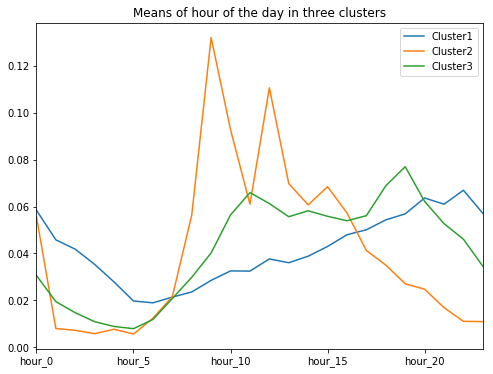

In [23]:
df_cm.plot(kind='line',title = 'Means of hour of the day in three clusters',\
          figsize = (8,6))

**b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).**



### In cluster 1 (blue line), the propotion of all crimes drop down from 11 pm to 5 am, and then clime up from 5 am to 11pm. 

### In cluster 2 (orange line), the propotion of all crimes drop from 12 pm till 5 am, and then dramatically fluctuate from 5 to 12 pm. The peak is reached around 9 am.

### in cluster 3 (green line), the propotion of all crimes has similar patterns as cluster 1, yet from 10 am to 7 pm, the propotion slightly drop down and then clime up to the peak of the day. 

** c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts) **



In [24]:
data3[res.labels_ == 0].crime_type.groupby(data3.crime_type).count()

crime_type
ARSON: BY FIRE                                                          1
ASSAULT: AGG PO HANDS NO/MIN INJURY                                     1
ASSAULT: AGGRAVATED: HANDGUN                                            1
ASSAULT: AGGRAVATED: OTHER FIREARM                                      1
ASSAULT: AGGRAVATED:KNIFE/CUTTING INSTR                                 1
BATTERY: AGG PO HANDS NO/MIN INJURY                                     1
BATTERY: AGG: HANDS/FIST/FEET SERIOUS INJURY                            1
BATTERY: AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY    1
BATTERY: AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST                1
BATTERY: AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON                 1
BATTERY: AGGRAVATED: HANDGUN                                            1
BATTERY: AGGRAVATED: OTHER DANG WEAPON                                  1
BATTERY: AGGRAVATED:KNIFE/CUTTING INSTR                                 1
BATTERY: DOMESTIC BATTERY S

### In cluster 1, we can see that in this cluster, there are more crime related to Robbery, Battery, Creminal Damage.

In [25]:
data3[res.labels_ == 1].crime_type.groupby(data3.crime_type).count()

crime_type
ASSAULT: PRO EMP HANDS NO/MIN INJURY                           1
BATTERY: PRO EMP HANDS NO/MIN INJURY                           1
DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTITY THEFT         1
DECEPTIVE PRACTICE: BOGUS CHECK                                1
DECEPTIVE PRACTICE: COUNTERFEIT CHECK                          1
DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT $300 AND UNDER    1
DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT OVER $ 300        1
DECEPTIVE PRACTICE: FORGERY                                    1
DECEPTIVE PRACTICE: FRAUD OR CONFIDENCE GAME                   1
DECEPTIVE PRACTICE: ILLEGAL USE CASH CARD                      1
OTHER OFFENSE: HARASSMENT BY TELEPHONE                         1
OTHER OFFENSE: SEX OFFENDER: FAIL REG NEW ADD                  1
PUBLIC PEACE VIOLATION: BOMB THREAT                            1
Name: crime_type, dtype: int64

### In cluster 2, we can see that in this cluster, there are more crime related to Deceptive practice.

In [26]:
data3[res.labels_ == 2].crime_type.groupby(data3.crime_type).count()

crime_type
ASSAULT: AGGRAVATED: OTHER DANG WEAPON                          1
ASSAULT: SIMPLE                                                 1
BATTERY: AGG: HANDS/FIST/FEET NO/MINOR INJURY                   1
BATTERY: AGGRAVATED OF A SENIOR CITIZEN                         1
BURGLARY: FORCIBLE ENTRY                                        1
BURGLARY: UNLAWFUL ENTRY                                        1
CRIMINAL TRESPASS: TO LAND                                      1
CRIMINAL TRESPASS: TO RESIDENCE                                 1
CRIMINAL TRESPASS: TO STATE SUP LAND                            1
DECEPTIVE PRACTICE: COUNTERFEITING DOCUMENT                     1
DECEPTIVE PRACTICE: CREDIT CARD FRAUD                           1
DECEPTIVE PRACTICE: THEFT OF LOST/MISLAID PROP                  1
GAMBLING: GAME/DICE                                             1
INTERFERENCE WITH PUBLIC OFFICER: OBSTRUCTING IDENTIFICATION    1
NARCOTICS: FOUND SUSPECT NARCOTICS                              1

### In cluster 3, we can see that in this cluster, there are more crime related to Narcotics,  Offense, and Theft.

**d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)**

In [27]:
data3_d = data3[['day_Sun', 'day_Mon', 'day_Tue','day_Wed', 'day_Thu', 'day_Fri', 'day_Sat']]


In [28]:
ClusterMeans_d = {'Cluster1': data3_d[res.labels_ == 0].mean(), \
                'Cluster2': data3_d[res.labels_ == 1].mean(),\
                'Cluster3': data3_d[res.labels_ == 2].mean()}

In [29]:
df_cmd = pd.DataFrame(data = ClusterMeans_d)
df_cmd

,Cluster1,Cluster2,Cluster3
day_Sun,0.150886,0.078582,0.126694
day_Mon,0.133700,0.158511,0.148161
day_Tue,0.137165,0.167456,0.149006
day_Wed,0.134891,0.172347,0.141457
day_Thu,0.134649,0.158838,0.146310
day_Fri,0.150685,0.162397,0.153289
day_Sat,0.158025,0.101868,0.135084


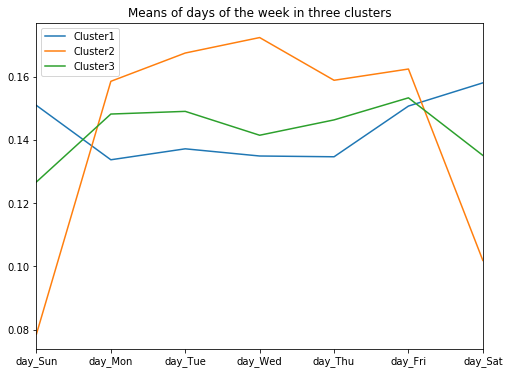

In [30]:
df_cmd.plot(kind='line',title = 'Means of days of the week in three clusters',\
          figsize = (8,6))

### From the figure we can see that except cluster 1, all cluster 2 and 3 have lower propotion of crimes in weekends compare to weekdays, expecially cluster 2. Yet for cluster 1, higher propotion happens during the weekends.

**e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file(data4), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  (5 pts)**

In [31]:
data3_e = data3[data3.columns[data3.columns.to_series().str.contains('community')]]
data3_e.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [32]:
Commu_p = {'Cluster1': data3_e[res.labels_ == 0].sum(), \
                'Cluster2': data3_e[res.labels_ == 1].sum(),\
                'Cluster3': data3_e[res.labels_ == 2].sum()}
df_cmp = pd.DataFrame(data = Commu_p)
df_cmp = df_cmp.T

In [33]:
df_cmp_1 = df_cmp / df_cmp.sum()
df_cmp_1

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
Cluster1,0.464052,0.485933,0.431240,0.427144,0.425587,0.439116,0.380532,0.354675,0.268751,0.370640,...,0.451787,0.471741,0.526756,0.453238,0.401622,0.407771,0.328100,0.403472,0.164144,0.40412
Cluster2,0.105147,0.126163,0.147108,0.176097,0.266766,0.164761,0.204615,0.192991,0.274415,0.215648,...,0.079013,0.070375,0.169180,0.087890,0.197836,0.101172,0.199949,0.147747,0.158015,0.19262
Cluster3,0.430801,0.387904,0.421653,0.396759,0.307647,0.396123,0.414853,0.452335,0.456834,0.413712,...,0.469200,0.457883,0.304064,0.458872,0.400542,0.491057,0.471951,0.448782,0.677841,0.40326


In [34]:
df_cmp_1.T.mean()

Cluster1    0.45329
Cluster2    0.12686
Cluster3    0.41985
dtype: float64

In [35]:
#Cluster 1
df_cmp_2 = df_cmp_1[df_cmp_1.index == ('Cluster1')]
df_cmp_2.iloc[0][df_cmp_2.iloc[0] > 0.45329 * 1.3]

community_area_36    0.599272
community_area_58    0.592892
community_area_59    0.620384
Name: Cluster1, dtype: float64

In [36]:
cluster1 = data4[data4['Community Area Number'] == (36)]
cluster1 = cluster1.append(data4[data4['Community Area Number'] == (58)])
cluster1 = cluster1.append(data4[data4['Community Area Number'] == (59)])

In [37]:
cluster1.mean() - data4.mean()

Community Area Number                             12.000000
centroid_x                                      4357.554524
centroid_y                                     -5721.826377
PERCENT OF HOUSING CROWDED                         2.709957
PERCENT HOUSEHOLDS BELOW POVERTY                   5.567100
PERCENT AGED 16+ UNEMPLOYED                        3.293939
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA      11.791775
PERCENT AGED UNDER 18 OR OVER 64                   2.686580
PER CAPITA INCOME                              -9131.502165
PERCENT OF HOUSING UNITS VACANT                   -0.158029
NUM_CRIMES_2016                                -1884.913420
dtype: float64

**For the cluster 1 of crimes, we can conclude that for those community area that have high propotion of cluster 1 crimes has lower income and higer unemplyed rate without high school diploma rate. **

In [38]:
#Cluster 2
df_cmp_c2 = df_cmp_1[df_cmp_1.index == ('Cluster2')]
df_cmp_c2.iloc[0][df_cmp_c2.iloc[0] > 0.12686 * 1.3]

community_area_4     0.176097
community_area_5     0.266766
community_area_7     0.204615
community_area_8     0.192991
community_area_9     0.274415
community_area_10    0.215648
community_area_12    0.221004
community_area_28    0.169314
community_area_32    0.216831
community_area_70    0.169180
community_area_72    0.197836
community_area_74    0.199949
community_area_77    0.192620
Name: Cluster2, dtype: float64

In [39]:
cluster2 = data4[data4['Community Area Number'] == (4)]
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (5)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (7)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (8)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (9)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (10)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (12)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (28)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (32)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (70)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (72)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (74)])
cluster2 = cluster1.append(data4[data4['Community Area Number'] == (77)])

In [40]:
cluster2.mean() - data4.mean()

Community Area Number                             18.500000
centroid_x                                      4028.854857
centroid_y                                      9097.719873
PERCENT OF HOUSING CROWDED                         1.826623
PERCENT HOUSEHOLDS BELOW POVERTY                   3.283766
PERCENT AGED 16+ UNEMPLOYED                        0.927273
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA       6.183442
PERCENT AGED UNDER 18 OR OVER 64                  -0.971753
PER CAPITA INCOME                              -4893.168831
PERCENT OF HOUSING UNITS VACANT                   -0.665328
NUM_CRIMES_2016                                -1682.246753
dtype: float64

**For the cluster 1 of crimes, we can conclude that for those community area that have high propotion of cluster 1 crimes has lower income and higer unemplyed rate without high school diploma rate. **

In [41]:
#Cluster 3
df_cmp_c3 = df_cmp_1[df_cmp_1.index == ('Cluster3')]
df_cmp_c3.iloc[0][df_cmp_c3.iloc[0] > 0.41985 * 1.25]

community_area_25    0.529710
community_area_26    0.531704
community_area_27    0.532608
community_area_32    0.530060
community_area_76    0.677841
Name: Cluster3, dtype: float64

In [42]:
cluster3 = data4[data4['Community Area Number'] == (25)]
cluster3 = cluster1.append(data4[data4['Community Area Number'] == (26)])
cluster3 = cluster1.append(data4[data4['Community Area Number'] == (27)])
cluster3 = cluster1.append(data4[data4['Community Area Number'] == (32)])
cluster3 = cluster1.append(data4[data4['Community Area Number'] == (76)])


In [43]:
cluster3.mean() - data4.mean()

Community Area Number                              18.250000
centroid_x                                     -10957.285143
centroid_y                                       8139.549623
PERCENT OF HOUSING CROWDED                          1.701623
PERCENT HOUSEHOLDS BELOW POVERTY                    2.583766
PERCENT AGED 16+ UNEMPLOYED                         0.402273
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA        6.483442
PERCENT AGED UNDER 18 OR OVER 64                    0.653247
PER CAPITA INCOME                               -6782.418831
PERCENT OF HOUSING UNITS VACANT                    -1.169947
NUM_CRIMES_2016                                 -1880.496753
dtype: float64

**For the cluster 1 of crimes, we can conclude that for those community area that have high propotion of cluster 1 crimes has lower income and higer unemplyed rate without high school diploma rate. **

**f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)**




In [44]:
data3[res.labels_ == 0].Category.groupby(data3.Category).count()

Category
P1P     6
P1V    22
P2     25
Name: Category, dtype: int64

** in cluster 1, we can see that all catergories are included in this cluster, and more P1V and P2.**

In [45]:
data3[res.labels_ == 1].Category.groupby(data3.Category).count()

Category
P2    13
Name: Category, dtype: int64

** in cluster 2, we can see that only P2 category shows up.**

In [46]:
data3[res.labels_ == 2].Category.groupby(data3.Category).count()

Category
P1P     9
P1V     2
P2     42
Name: Category, dtype: int64

** in cluster 3, we can see that all catergories are included in this cluster, but much more of P2 crime than others.**

** g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes.  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)**





In [47]:
data3_g = data3[['day_Sun', 'day_Mon', 'day_Tue','day_Wed', 'day_Thu', 'day_Fri', 'day_Sat']]

***(i) k-means ***

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

#Choose a range(list) of clusters you would like to try:
range_n_clusters = 10

for n_clusters in range(range_n_clusters):
    km = KMeans(random_state = 324,n_clusters = n_clusters + 2)
    res_g = km.fit(data3_g)
    cluster_labels = res_g.labels_
    silhouette_avg = silhouette_score(data3_g, cluster_labels)
    print("For n_clusters ={},".format(n_clusters +2)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.234967039802
For n_clusters =3, the average silhouette_score is :0.232859305226
For n_clusters =4, the average silhouette_score is :0.210690671645
For n_clusters =5, the average silhouette_score is :0.153223514174
For n_clusters =6, the average silhouette_score is :0.170242880032
For n_clusters =7, the average silhouette_score is :0.173353484564
For n_clusters =8, the average silhouette_score is :0.184212008422
For n_clusters =9, the average silhouette_score is :0.137644013416
For n_clusters =10, the average silhouette_score is :0.129949474409
For n_clusters =11, the average silhouette_score is :0.138430459949


** From the result above, I will use KMeans into k = 2 clusters**

In [49]:
km = KMeans(random_state = 324,n_clusters = 2)
res_g = km.fit(data3_g)
data3_g.groupby(res_g.labels_).count()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,56,56,56,56,56,56,56
1,63,63,63,63,63,63,63


**(ii) Gaussian mixture models**


In [50]:
from sklearn import mixture

In [51]:
range_n_clusters = 10

for n_clusters in range(range_n_clusters):
    gmm = mixture.GaussianMixture(n_components = n_clusters + 2, covariance_type='full').fit(data3_g)
    cluster_labels = gmm.predict(data3_g)
    silhouette_avg = silhouette_score(data3_g, cluster_labels)
    print("For n_clusters ={},".format(n_clusters +2)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.294656640863
For n_clusters =3, the average silhouette_score is :0.350076589098
For n_clusters =4, the average silhouette_score is :0.208964140648
For n_clusters =5, the average silhouette_score is :0.0873071487097
For n_clusters =6, the average silhouette_score is :0.171849008637
For n_clusters =7, the average silhouette_score is :0.112564127024
For n_clusters =8, the average silhouette_score is :0.164677620303
For n_clusters =9, the average silhouette_score is :0.148927658074
For n_clusters =10, the average silhouette_score is :0.118630433701
For n_clusters =11, the average silhouette_score is :0.128551354757


** From the result above, I will use KMeans into k = 2 clusters**

In [52]:
gmm = mixture.GaussianMixture(n_components = 2, covariance_type='full').fit(data3_g)
data3_g.groupby(gmm.predict(data3_g)).count()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,93,93,93,93,93,93,93
1,26,26,26,26,26,26,26


**(iii) Bottom-up hierarchical clustering with "single link" distance metric**

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
range_n_clusters = 10

for n_clusters in range(range_n_clusters):
    clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters+2)
    clustering.fit(data3_g)
    cluster_labels = clustering.labels_
    silhouette_avg = silhouette_score(data3_g, cluster_labels)
    print("For n_clusters ={},".format(n_clusters +2)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.217435949051
For n_clusters =3, the average silhouette_score is :0.18411694308
For n_clusters =4, the average silhouette_score is :0.193210910146
For n_clusters =5, the average silhouette_score is :0.205235501444
For n_clusters =6, the average silhouette_score is :0.146837159975
For n_clusters =7, the average silhouette_score is :0.155740993406
For n_clusters =8, the average silhouette_score is :0.16920621073
For n_clusters =9, the average silhouette_score is :0.154596389811
For n_clusters =10, the average silhouette_score is :0.158022954891
For n_clusters =11, the average silhouette_score is :0.155076771782


** From the result above, I will use 2 clusters**

In [56]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)
clustering.fit(data3_g)
data3_g.groupby(clustering.labels_).count()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,68,68,68,68,68,68,68
1,51,51,51,51,51,51,51


**(iv) Bottom-up hierarchical clustering with "complete link" distance metric. **

In [57]:
range_n_clusters = 10

for n_clusters in range(range_n_clusters):
    clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_clusters+2)
    clustering.fit(data3_g)
    cluster_labels = clustering.labels_
    silhouette_avg = silhouette_score(data3_g, cluster_labels)
    print("For n_clusters ={},".format(n_clusters +2)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.610064611355
For n_clusters =3, the average silhouette_score is :0.172687181466
For n_clusters =4, the average silhouette_score is :0.192151693748
For n_clusters =5, the average silhouette_score is :0.150252078225
For n_clusters =6, the average silhouette_score is :0.152296815722
For n_clusters =7, the average silhouette_score is :0.149262676161
For n_clusters =8, the average silhouette_score is :0.101304401234
For n_clusters =9, the average silhouette_score is :0.100665038992
For n_clusters =10, the average silhouette_score is :0.110611324315
For n_clusters =11, the average silhouette_score is :0.125371418564


** From the result above, I will use 2 clusters**

In [58]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=2)
clustering.fit(data3_g)
data3_g.groupby(clustering.labels_).count()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,117,117,117,117,117,117,117
1,2,2,2,2,2,2,2
